In [1]:
import numpy as np

import qiskit
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.visualization import plot_histogram

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.0',
 'qiskit-aer': '0.7.0',
 'qiskit-ignis': '0.5.0',
 'qiskit-ibmq-provider': '0.11.0',
 'qiskit-aqua': '0.8.0',
 'qiskit': '0.23.0'}

In [3]:
n = 3

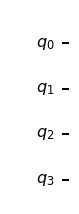

In [4]:
const_function = QuantumCircuit(n+1)

gen = np.random.RandomState(seed=123)
output = gen.randint(2)

if output == 1:
    const_function.x(n)
    
const_function.draw(output='mpl')

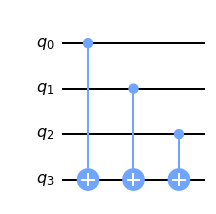

In [5]:
balanced_function = QuantumCircuit(n+1)

for qubit in range(n):
    balanced_function.cx(qubit, n)

balanced_function.draw(output='mpl')

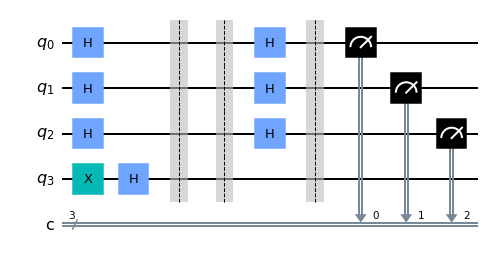

In [6]:
circ = QuantumCircuit(n+1, n)

for qubit in range(n):
    circ.h(qubit)

circ.x(n)
circ.h(n)

circ.barrier()

circ += const_function

circ.barrier()

for qubit in range(n):
    circ.h(qubit)
    
circ.barrier()

for i in range(n):
    circ.measure(i, i)

circ.draw(output='mpl')

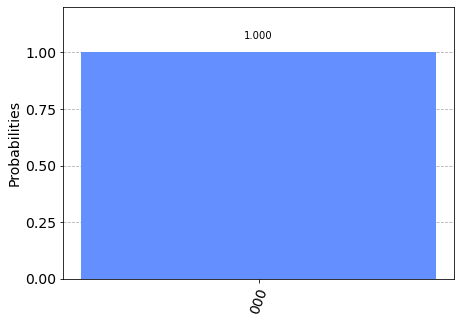

In [7]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circ, backend=backend, shots=1024).result().get_counts()
plot_histogram(result)

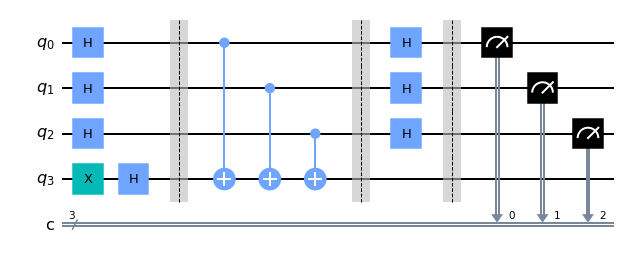

In [8]:
circ = QuantumCircuit(n+1, n)

for qubit in range(n):
    circ.h(qubit)

circ.x(n)
circ.h(n)

circ.barrier()

circ += balanced_function

circ.barrier()

for qubit in range(n):
    circ.h(qubit)
    
circ.barrier()

for i in range(n):
    circ.measure(i, i)

circ.draw(output='mpl')

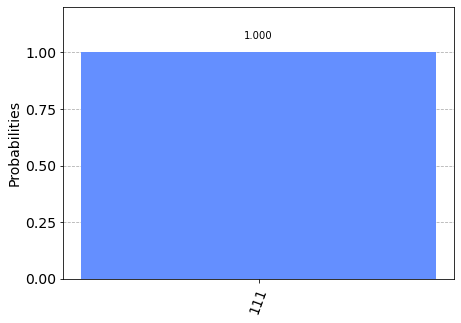

In [9]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circ, backend=backend, shots=1024).result().get_counts()
plot_histogram(result)